In [1]:

from imutils import face_utils
import dlib
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)
path = '../output/'

In [ ]:
def oklesgo():
    for filePath in sorted(os.listdir(path)):

        if filePath.endswith(".jpg"):
            print(path)
            print(filePath)
            image = cv2.imread(os.path.join(path, filePath))
            # convert to floating point?
            # image = np.float32(image) / 255.0

            # image = imutils.resize(image, 600, 600)
            rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            rects = detector(rgb, 0)
            rects2 = detector(grey, 0)
            print("Number of faces detected: {}".format(len(rects2)))
            for i, d in enumerate(rects2):
                print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
                    i, d.left(), d.top(), d.right(), d.bottom()))
            rect = rects[0]
            rect2 = rects2[0]
            landmarks = predictor(rgb, rect)
            landmarks = face_utils.shape_to_np(landmarks)  # these are the 68 landmarks
            # print(landmarks)
            landmarks2 = predictor(grey, rect2)
            landmarks2 = face_utils.shape_to_np(landmarks2)
            # print(len(landmarks2))
            # print(landmarks2)  # this seems more accurate!
            newName = path + filePath + "G.txt"
            print(newName)
            file_object = open(newName, "w")
            np.savetxt(file_object, landmarks2, fmt="%d", delimiter=" ")
            file_object.close()

def read_output_txt(name):
    # landmarks = np.loadtxt(name, dtype=int, delimiter='\n')
    # file = open(name, "r")
    # landmarks = list(map(int, file.read().split("\n")))
    img = cv2.imread(name)
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rects2 = detector(grey, 0)
    rect2 = rects2[0]
    landmarks2 = predictor(grey, rect2)
    landmarks2 = face_utils.shape_to_np(landmarks2)

    return landmarks2

def euclidean_distance(arr1, arr2):
    return np.sqrt((arr1[0] - arr2[0])**2 + (arr1[1] - arr2[1])**2)

def find_variance():
    return None

In [ ]:
if __name__ == '__main__':
    # oklesgo()

    landmarks1 = read_output_txt("../output/output1.jpg")
    landmarks2 = read_output_txt("../output/output2.jpg")
    landmarks3 = read_output_txt("../output/output3.jpg")

    # Some statistics that might be interesting:
    # Face width: distance of points 6-12, 1-17, 3-15,
    # Face length: 8-22 , 10-23
    # Mouth width: 49-55
    # Mouth length: 52-58

    bottom_face_width_array = []
    top_face_width_array = []
    middle_face_width_array = []
    left_eye_face_length_array = []
    right_eye_face_length_array = []
    mouth_width_array = []
    mouth_length_array = []

    # Face width
    bottom_face_width1 = euclidean_distance(landmarks1[5], landmarks1[11])
    bottom_face_width_array.append(bottom_face_width1)

    top_face_width1 = euclidean_distance(landmarks1[0], landmarks1[16])
    top_face_width_array.append(top_face_width1)

    middle_face_width1 = euclidean_distance(landmarks1[2], landmarks1[14])
    middle_face_width_array.append(middle_face_width1)

    # Face length
    left_eye_face_length1 = euclidean_distance(landmarks1[7], landmarks1[21])
    left_eye_face_length_array.append(left_eye_face_length1)

    right_eye_face_length1 = euclidean_distance(landmarks1[9], landmarks1[22])
    right_eye_face_length_array.append(right_eye_face_length1)

    # Mouth width && length
    mouth_width1 = euclidean_distance(landmarks1[48], landmarks1[54])
    mouth_width_array.append(mouth_width1)

    mouth_length1 = euclidean_distance(landmarks1[51], landmarks1[57])
    mouth_length_array.append(mouth_length1)

    # Face width
    bottom_face_width2 = euclidean_distance(landmarks2[5], landmarks2[11])
    bottom_face_width_array.append(bottom_face_width2)

    top_face_width2 = euclidean_distance(landmarks2[0], landmarks2[16])
    top_face_width_array.append(top_face_width2)

    middle_face_width2 = euclidean_distance(landmarks2[2], landmarks2[14])
    middle_face_width_array.append(middle_face_width2)


    # Face length
    left_eye_face_length2 = euclidean_distance(landmarks2[7], landmarks2[21])
    left_eye_face_length_array.append(left_eye_face_length2)

    right_eye_face_length2 = euclidean_distance(landmarks2[9], landmarks2[22])
    right_eye_face_length_array.append(right_eye_face_length2)


    # Mouth width && length
    mouth_width2 = euclidean_distance(landmarks2[48], landmarks2[54])
    mouth_width_array.append(mouth_width2)

    mouth_length2 = euclidean_distance(landmarks2[51], landmarks2[57])
    mouth_length_array.append(mouth_length2)

    # Face width
    bottom_face_width3 = euclidean_distance(landmarks3[5], landmarks3[11])
    bottom_face_width_array.append(bottom_face_width3)

    top_face_width3 = euclidean_distance(landmarks3[0], landmarks3[16])
    top_face_width_array.append(top_face_width3)

    middle_face_width3 = euclidean_distance(landmarks3[2], landmarks3[14])
    middle_face_width_array.append(middle_face_width3)


    # Face length
    left_eye_face_length3 = euclidean_distance(landmarks3[7], landmarks3[21])
    left_eye_face_length_array.append(left_eye_face_length3)

    right_eye_face_length3 = euclidean_distance(landmarks3[9], landmarks3[22])
    right_eye_face_length_array.append(right_eye_face_length3)


    # Mouth width && length
    mouth_width3 = euclidean_distance(landmarks3[48], landmarks3[54])
    mouth_width_array.append(mouth_width3)

    mouth_length3 = euclidean_distance(landmarks3[51], landmarks3[57])
    mouth_length_array.append(mouth_length3)

In [ ]:
    # Calculating the means
    bottom_face_width_mean = np.mean(bottom_face_width_array)
    top_face_width_mean = np.mean(top_face_width_array)
    middle_face_width_mean = np.mean(middle_face_width_array)
    left_eye_face_length_mean = np.mean(left_eye_face_length_array)
    right_eye_face_length_mean = np.mean(right_eye_face_length_array)
    mouth_width_mean = np.mean(mouth_width_array)
    mouth_length_mean = np.mean(mouth_length_array)

In [3]:
    # Calculating the variances
    bottom_face_width_var = np.var(bottom_face_width_array)
    top_face_width_var = np.var(top_face_width_array)
    middle_face_width_var = np.var(middle_face_width_array)
    left_eye_face_length_var = np.var(left_eye_face_length_array)
    right_eye_face_length_var = np.var(right_eye_face_length_array)
    mouth_width_var = np.var(mouth_width_array)
    mouth_length_var = np.var(mouth_length_array)


In [5]:
    # Zucc's turn
    zuccmark = read_output_txt("../output/zucc.jpg")

    zucc_bottom_face_width = euclidean_distance(zuccmark[5], zuccmark[11])
    zucc_top_face_width = euclidean_distance(zuccmark[0], zuccmark[16])
    zucc_middle_face_width = euclidean_distance(zuccmark[2], zuccmark[14])
    # Face length
    zucc_left_eye_face_length = euclidean_distance(zuccmark[7], zuccmark[21])
    zucc_right_eye_face_length = euclidean_distance(zuccmark[9], zuccmark[22])
    # Mouth width && length
    zucc_mouth_width = euclidean_distance(zuccmark[48], zuccmark[54])
    zucc_mouth_length = euclidean_distance(zuccmark[51], zuccmark[57])

418.0390398081968
962.4993506491317


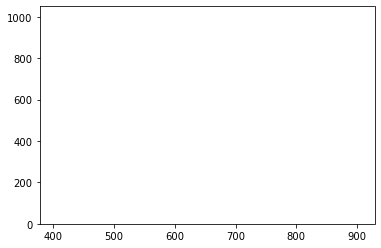

In [24]:
    # Plotting the means
    print(top_face_width_mean)
    print(zucc_top_face_width)
    plt.bar(middle_face_width_mean, [0, 1000], color='b', align='center')
    plt.bar(zucc_middle_face_width, [0, 1000], color='g')
    plt.show()
    # plt.plot(top_face_width_mean, zucc_top_face_width)


In [ ]:

    # Plotting the vars
